## Data Preprocessing
this notebook will parse the .mat file into more friendly numpy style data and save as pickle file <br \>
**NOTE: **DO NOT cross run this notebook! (because a same data name is used)

In [15]:
from __future__ import print_function
from scipy import io as sio
import numpy as np
import matplotlib.pyplot as plt
import display_center as dc
from IPython.display import display, Image
from six.moves import cPickle as pickle
%matplotlib inline

*next cell define a function loads the data from .mat file*

In [16]:
def load_mat_data(filename = None):
    '''WARNING: this function will flatten y into shape(len,)'''
    print("loading data from ", filename)
    try:
        data_dict = sio.loadmat(filename)
    except:
        print("File Not Found!")
        return None
    X = data_dict['X']
    y = data_dict['y'].flatten().astype(float)
    print("SUCCESS!")
    print("shape of data:", X.shape, "shape of labels:", y.shape)
    return X, y


print("\nLOADING MAT DATA...")

train_X, train_y = load_mat_data("train_32x32.mat")
test_X, test_y = load_mat_data("test_32x32.mat")
extra_X,extra_y = load_mat_data("extra_32x32.mat")


'''fake data set just for fast testing
    comment the original and uncomment the three lines below'''
#train_X, train_y = 255.* np.random.random([32,32,3,300]), .1*np.random.randint(1,11, [300,])
#test_X, test_y = 255.* np.random.random([32,32,3,50]), .1*np.random.randint(1,11, [50,])
#extra_X, extra_y = 255.* np.random.random([32,32,3,600]), .1*np.random.randint(1,11, [600,])


LOADING MAT DATA...
loading data from  train_32x32.mat
SUCCESS!
shape of data: (32, 32, 3, 73257) shape of labels: (73257,)
loading data from  test_32x32.mat
SUCCESS!
shape of data: (32, 32, 3, 26032) shape of labels: (26032,)
loading data from  extra_32x32.mat
SUCCESS!
shape of data: (32, 32, 3, 531131) shape of labels: (531131,)


'fake data set just for fast testing\n    comment the original and uncomment the three lines below'

In [17]:
# the data store the 0 as 10, make it python friendly
num_labels = 10
train_y[train_y == 10.0] = 0
test_y[test_y == 10.0] = 0
extra_y[extra_y == 10.0] = 0

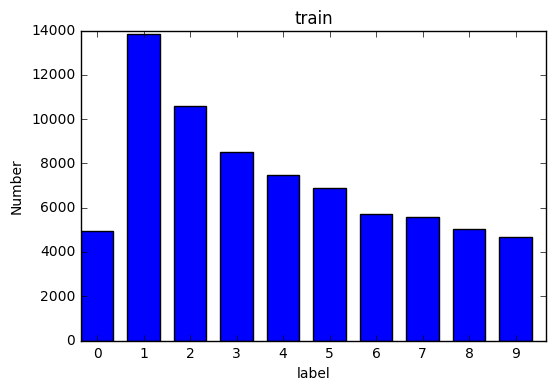

In [18]:
dc.peek_distribution(train_y, plt, "train")

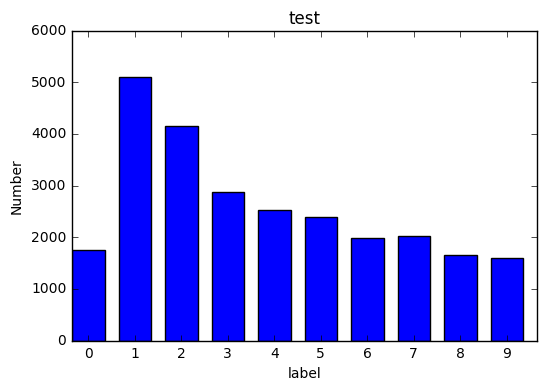

In [19]:
dc.peek_distribution(test_y, plt, "test")

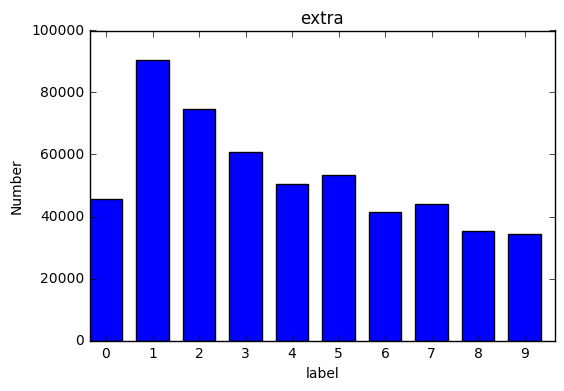

In [20]:
dc.peek_distribution(extra_y, plt, "extra")

*next cell will reformat the data*

In [21]:
def reformat(X):
    ## reformat X
    new_X = X.transpose((3,0,1,2))
    print("X's shape after reformating: ", new_X.shape) 
    return new_X
    
print("reformating training data")    
train_X = reformat(train_X)
print("reformating testing data")
test_X = reformat(test_X)
print("reformating extra data")
extra_X = reformat(extra_X)

reformating training data
X's shape after reformating:  (73257, 32, 32, 3)
reformating testing data
X's shape after reformating:  (26032, 32, 32, 3)
reformating extra data
X's shape after reformating:  (531131, 32, 32, 3)


*next cell will transfer the images to grayscale*

In [22]:
# mean gray
train_X = np.mean(train_X, axis = 3)
test_X = np.mean(test_X, axis = 3)
extra_X = np.mean(extra_X, axis = 3)
print(train_X.shape)
print(test_X.shape)
print(extra_X.shape)

(73257, 32, 32)
(26032, 32, 32)
(531131, 32, 32)


*next cell will check if the images are good*

[[[  33.66666667   19.           17.         ...,   64.33333333   72.
     75.66666667]
  [  34.           20.33333333   17.         ...,   43.           59.
     73.66666667]
  [  39.66666667   21.66666667   18.66666667 ...,   32.33333333
     40.33333333   64.66666667]
  ..., 
  [  80.66666667   80.           75.33333333 ...,   98.33333333
     96.66666667   95.33333333]
  [  78.           79.           76.66666667 ...,   99.           98.66666667
     98.66666667]
  [  80.33333333   81.           77.         ...,  100.66666667  100.           96.        ]]

 [[  73.           75.           70.33333333 ...,   79.           77.33333333
     77.33333333]
  [  74.33333333   73.33333333   67.33333333 ...,   78.33333333   79.
     78.66666667]
  [  73.           71.           55.         ...,   79.33333333   79.           79.        ]
  ..., 
  [  90.           89.33333333   87.         ...,   98.           97.           93.        ]
  [  95.33333333   96.33333333   97.66666667 ...,   97.

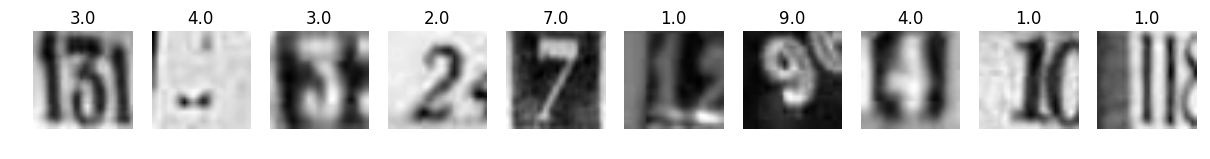

In [23]:
random_idc = np.random.randint(0, train_X.shape[0], 10)
dc.sample_display(train_X, train_y, plt, random_idc)

print(train_X[0:2])

In [24]:
print(random_idc)

[28486  4608   639  4479 31766 24142  6543  6874 38916 64649]


*next cell will do GCN to the images*

In [25]:
imsize = 32
def gcn(X):
    means = np.mean(X, axis = (1, 2))
    stds = np.std(X, axis = (1, 2), ddof = 1)
    stds[stds < 1e-8] = 1.
    new_X = X - np.tensordot(means, np.ones([imsize, imsize]), 0)
    new_X = new_X/np.tensordot(stds, np.ones([imsize, imsize]), 0)
    return new_X

print("dealing with training data...")
%time train_X = gcn(train_X)
print("dealing with testing data...")
%time test_X = gcn(test_X)
print("dealing with extra data...")
%time extra_X = gcn(extra_X)
print(train_X.shape)
print(test_X.shape)
print(extra_X.shape)

dealing with training data...
CPU times: user 1.68 s, sys: 648 ms, total: 2.32 s
Wall time: 9 s
dealing with testing data...
CPU times: user 684 ms, sys: 124 ms, total: 808 ms
Wall time: 2.72 s
dealing with extra data...
CPU times: user 16.8 s, sys: 1min 6s, total: 1min 23s
Wall time: 25min 42s
(73257, 32, 32)
(26032, 32, 32)
(531131, 32, 32)


[[[-1.28437269 -1.91528671 -2.00132044 ...,  0.03481117  0.36460714
    0.52233565]
  [-1.27003373 -1.85793089 -2.00132044 ..., -0.88288195 -0.19461211
    0.43630191]
  [-1.0262715  -1.80057507 -1.92962567 ..., -1.34172851 -0.99759359
    0.04915013]
  ..., 
  [ 0.73741997  0.70874206  0.50799669 ...,  1.49738459  1.42568981
    1.36833399]
  [ 0.62270833  0.6657252   0.56535251 ...,  1.5260625   1.51172354
    1.51172354]
  [ 0.72308102  0.75175893  0.57969147 ...,  1.59775727  1.56907936
    1.3970119 ]]

 [[-0.01253182  0.08746231 -0.14585731 ...,  0.28745055  0.20412212
    0.20412212]
  [ 0.05413093  0.00413387 -0.29584849 ...,  0.25411918  0.28745055
    0.27078486]
  [-0.01253182 -0.11252594 -0.91247891 ...,  0.30411624  0.28745055
    0.28745055]
  ..., 
  [ 0.83741822  0.80408685  0.68742704 ...,  1.23739471  1.18739765
    0.9874094 ]
  [ 1.10406921  1.15406627  1.22072902 ...,  1.22072902  1.22072902
    1.08740353]
  [ 1.18739765  1.2540604   1.35405452 ...,  1.40405158  1

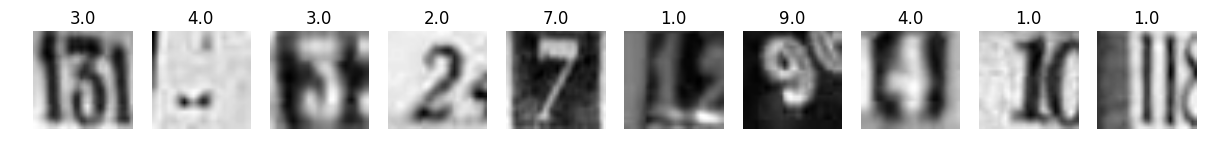

In [26]:
dc.sample_display(train_X, train_y, plt, random_idc)
print(train_X[0:2])

*next cell will split the data into random shuffle train, valid, and test data for pickling* <BR \>
**WARNING:** Now you **SHOULD NOT** use the fake data

In [27]:
# a scheme for pickling data
# training: 100,000 = all original training excluding those for valid, plus samples from extra
# validation: 6,000 = 400 for each class in original training, plus 200 for each in extra 
# testing: stay the same

# make some random indices

num_labels = 10

def random_idc(y, each, num_labels = 10):
    '''
    generate random entries of size 'each' for a data set
    of normal distribution (1/num_labels)
    '''
    idc = []
    for i in range(num_labels):
        cand = np.where(y == i)[0]
        idc.extend(cand[:each/2])
        idc.extend(cand[-each/2:])
    idc = np.array(idc)
    np.random.seed()
    np.random.shuffle(idc)
    return idc

val_idc = random_idc(train_y, 400)
val_idc_e = random_idc(extra_y, 200)

print("picking validation data from training data and extra data...")
val_X = np.concatenate([train_X[val_idc], extra_X[val_idc_e]], axis = 0)
val_y = np.concatenate([train_y[val_idc], extra_y[val_idc_e]], axis = 0)

# exclude validation data from both training and extra
train_X = np.delete(train_X, val_idc, 0)
train_y = np.delete(train_y, val_idc, 0)
extra_X = np.delete(extra_X, val_idc_e, 0)
extra_y = np.delete(extra_y, val_idc_e, 0)

print("SUCCESS!")
print(train_X.shape)
print(extra_X.shape)
print(val_X.shape)

picking validation data from training data and extra data...
SUCCESS!
(69257, 32, 32)
(529131, 32, 32)
(6000, 32, 32)


In [28]:
# since the data is of bad distribution, it should be rearrange
y_stat = [len(np.where(train_y == float(i))[0]) for i in range(num_labels)]
train_each = 10000
stat_min = min(y_stat)
num_more = train_each - stat_min

train_idc = random_idc(train_y, stat_min)
train_idc_e = random_idc(extra_y, num_more)

**NOTE:** implementing next cell will delete the data in train_X and extra_y that is not needed

In [29]:
print("building a normal distribution training dataset")
train_X = np.concatenate([train_X[train_idc], extra_X[train_idc_e]], axis = 0)
train_y = np.concatenate([train_y[train_idc], extra_y[train_idc_e]], axis = 0)

print("SUCCESS!")
print(train_X.shape)
print(val_X.shape)

building a normal distribution training dataset
SUCCESS!
(100000, 32, 32)
(6000, 32, 32)


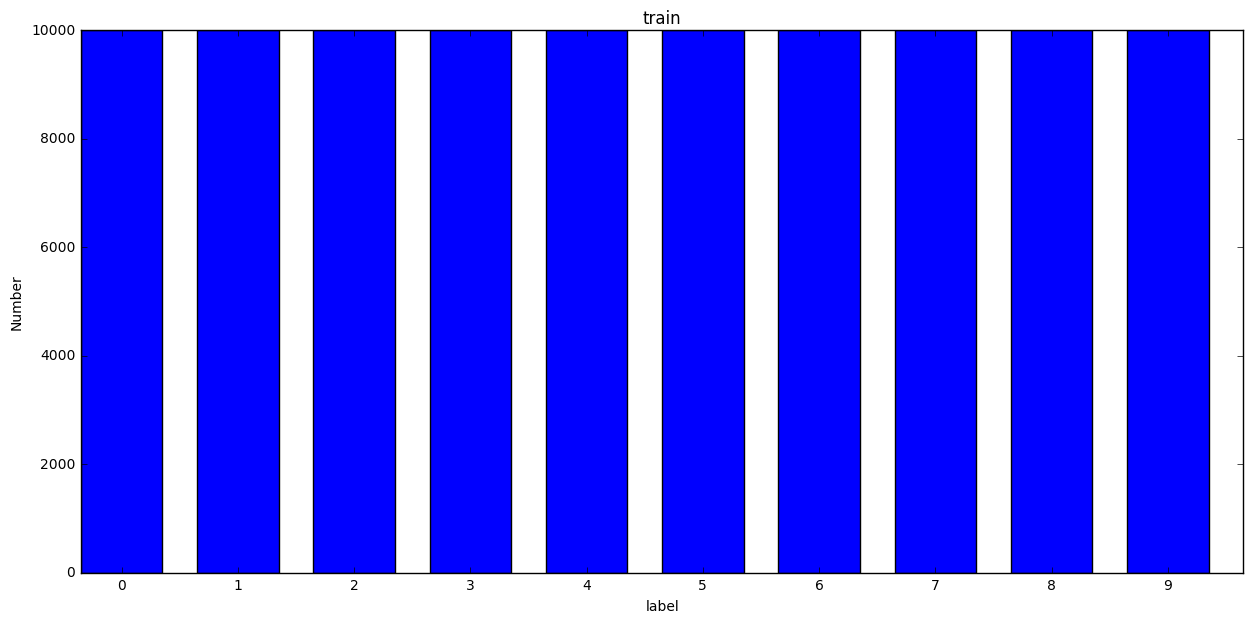

In [30]:
plt.rcParams['figure.figsize'] = (15.0,7.0)
dc.peek_distribution(train_y, plt, 'train')

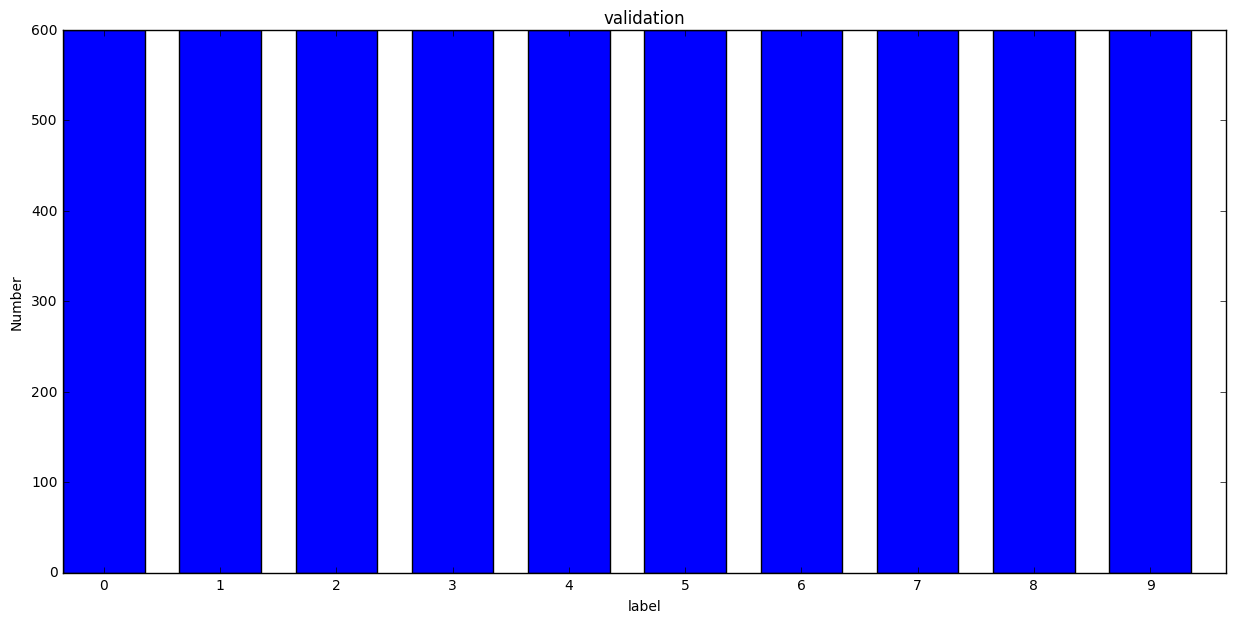

In [31]:
dc.peek_distribution(val_y, plt, 'validation')

*the next cell will pickle the file*

In [32]:
import os
def maybe_pickle(file_name, X, y, force = False):
    if os.path.exists(file_name) and not force:
        print("%s already presents, you can set 'force = True' to overwrite" %file_name)
    else:
        print("pickling %s" %file_name)
        data = {"X": X, "y": y}
        try:
            with open(file_name, 'wb') as f:
                pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print("sorry, pickling failed: ", e)
        
%time maybe_pickle("train.pickle", train_X, train_y)
%time maybe_pickle("validation.pickle", val_X, val_y)
%time maybe_pickle("test.pickle", test_X, test_y)
        
    
        

train.pickle already presents, you can set 'force = True' to overwrite
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 27.5 ms
validation.pickle already presents, you can set 'force = True' to overwrite
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 183 µs
test.pickle already presents, you can set 'force = True' to overwrite
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 190 µs
